In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('../input/montcoalert/911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df.drop('e',axis=1)

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END
...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE


In [7]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [9]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [10]:
x=df['title'].iloc[0]
x.split(':')[0]

'EMS'

In [11]:
df['reason']=df['title'].apply(lambda title: title.split(':')[0])
df['reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: reason, Length: 663522, dtype: object

In [12]:
df['reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='count'>

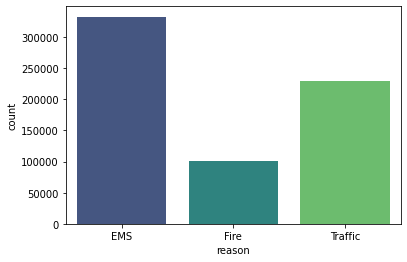

In [13]:
sns.countplot(x='reason',data=df,palette='viridis')

In [14]:
type(df['timeStamp'].iloc[0])

str

In [15]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [16]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
time=df['timeStamp'].iloc[0]
time.hour

17

In [18]:
time.year

2015

In [19]:
time.month

12

In [20]:
time.dayofweek

3

In [21]:
df['Hour']=df['timeStamp'].apply(lambda time: time.hour)

In [22]:
df['Hour']

0         17
1         17
2         14
3         16
4         16
          ..
663517    15
663518    15
663519    15
663520    15
663521    15
Name: Hour, Length: 663522, dtype: int64

In [23]:
df['Month']=df['timeStamp'].apply(lambda time:time.month)

In [24]:
df['Month']

0         12
1         12
2         12
3         12
4         12
          ..
663517     7
663518     7
663519     7
663520     7
663521     7
Name: Month, Length: 663522, dtype: int64

In [25]:
df['Dayofweek']=df['timeStamp'].apply(lambda time:time.dayofweek)

In [26]:
df['Dayofweek']

0         3
1         3
2         3
3         3
4         3
         ..
663517    2
663518    2
663519    2
663520    2
663521    2
Name: Dayofweek, Length: 663522, dtype: int64

In [27]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [28]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [29]:
df['Dayofweek'] = df['Dayofweek'].map(dmap)

In [30]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


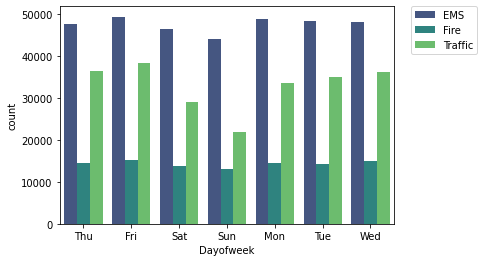

In [31]:
sns.countplot(x='Dayofweek',data=df,hue='reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

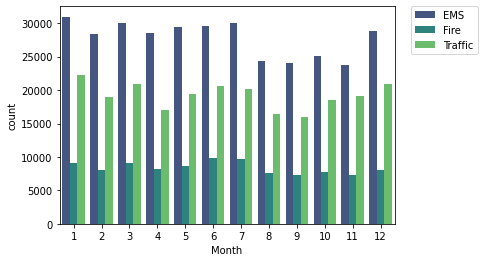

In [32]:
sns.countplot(x='Month',data=df,hue='reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [33]:
byMonth=df.groupby('Month').count()

In [34]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Dayofweek
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


<AxesSubplot:xlabel='Month'>

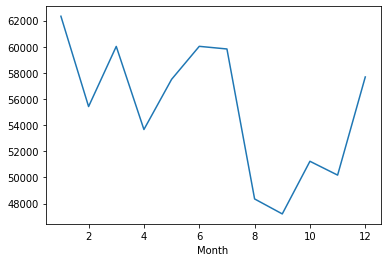

In [35]:
byMonth['lat'].plot()

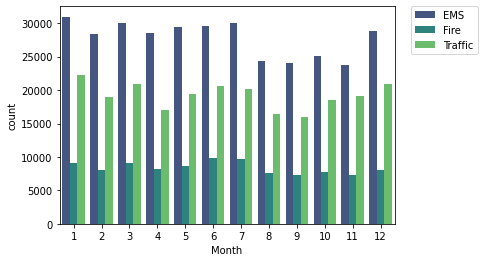

In [36]:
sns.countplot(x='Month',data=df,hue='reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

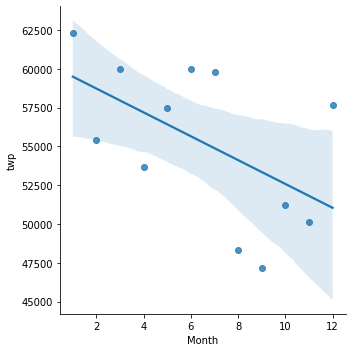

In [37]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [38]:
t=df['timeStamp'].iloc[0]

In [39]:
t

Timestamp('2015-12-10 17:10:52')

In [40]:
t.date()

datetime.date(2015, 12, 10)

In [41]:
df['Date']=df['timeStamp'].apply(lambda t:t.date())

In [42]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Dayofweek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


In [43]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Dayofweek
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


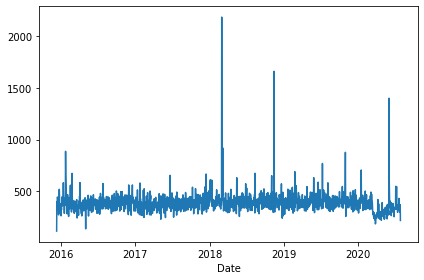

In [44]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

In [45]:
df[df['reason']=='Traffic'].groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Dayofweek
Date,,,,,,,,,,,,,
2015-12-10,41,41,41,34,41,41,41,41,41,41,41,41,41
2015-12-11,137,137,137,107,137,137,137,137,137,137,137,137,137
2015-12-12,145,145,145,110,145,145,145,145,145,145,145,145,145
2015-12-13,75,75,75,53,75,75,75,75,75,75,75,75,75
2015-12-14,184,184,184,150,184,184,184,184,184,184,184,184,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-25,81,81,81,66,81,81,81,81,81,81,81,81,81
2020-07-26,88,88,88,76,88,88,88,88,88,88,88,88,88
2020-07-27,84,84,84,58,84,84,84,84,84,84,84,84,84


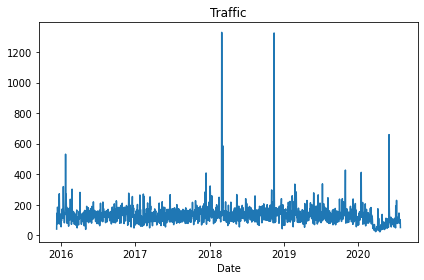

In [46]:
df[df['reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

In [47]:
df[df['reason']=='Fire'].groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Dayofweek
Date,,,,,,,,,,,,,
2015-12-10,15,15,15,13,15,15,15,15,15,15,15,15,15
2015-12-11,68,68,68,59,68,68,68,68,68,68,68,68,68
2015-12-12,69,69,69,54,69,69,69,69,69,69,69,69,69
2015-12-13,50,50,50,47,50,50,50,50,50,50,50,50,50
2015-12-14,39,39,39,36,39,39,38,39,39,39,39,39,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-25,56,56,56,40,56,56,56,56,56,56,56,56,56
2020-07-26,45,45,45,42,45,45,45,45,45,45,45,45,45
2020-07-27,61,61,61,57,61,61,61,61,61,61,61,61,61


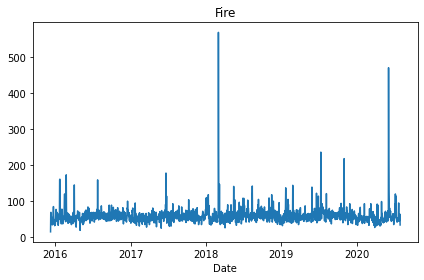

In [48]:
df[df['reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

In [49]:
df[df['reason']=='EMS'].groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Dayofweek
Date,,,,,,,,,,,,,
2015-12-10,58,58,58,53,58,58,58,58,58,58,58,58,58
2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186,186
2015-12-12,188,188,188,170,188,188,188,188,188,188,188,188,188
2015-12-13,191,191,191,179,191,191,191,191,191,191,191,191,191
2015-12-14,221,221,221,200,221,221,221,221,221,221,221,221,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-25,181,181,181,165,181,181,181,181,181,181,181,181,181
2020-07-26,163,163,163,153,163,163,163,163,163,163,163,163,163
2020-07-27,184,184,184,173,184,184,184,184,184,184,184,184,184


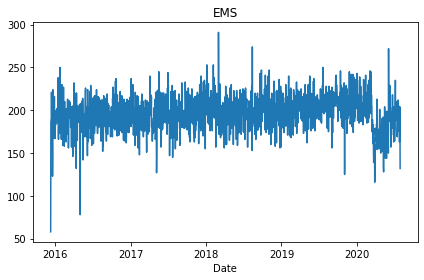

In [50]:
df[df['reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [51]:
df.groupby(by=['Dayofweek','Hour']).count()

lat   lng  desc   zip  title  timeStamp   twp  addr     e  \
Dayofweek Hour                                                               
Fri       0     1983  1983  1983  1752   1983       1983  1981  1983  1983   
          1     1635  1635  1635  1451   1635       1635  1632  1635  1635   
          2     1449  1449  1449  1311   1449       1449  1449  1449  1449   
          3     1296  1296  1296  1173   1296       1296  1296  1296  1296   
          4     1339  1339  1339  1227   1339       1339  1338  1339  1339   
...              ...   ...   ...   ...    ...        ...   ...   ...   ...   
Wed       19    4686  4686  4686  4165   4686       4686  4684  4686  4686   
          20    4116  4116  4116  3661   4116       4116  4113  4116  4116   
          21    3537  3537  3537  3143   3537       3537  3530  3537  3537   
          22    2826  2826  2826  2511   2826       2826  2825  2826  2826   
          23    2207  2207  2207  1965   2207       2207  2204  2207  2207   

                reason  Month  Date  
Dayofweek Hour                       
Fri       0       1983   1983  1983  
          1       1635   1635  1635  
          2       1449   1449  1449  
          3       1296   1296  1296  
          4       1339   1339  1339  
...                ...    ...   ...  
Wed       19      4686   4686  4686  
          20      4116   4116  4116  
          21      3537   3537  3537  
          22      2826   2826  2826  
          23      2207   2207  2207  

[168 rows x 12 columns]

In [52]:
df.groupby(by=['Dayofweek','Hour']).count()['reason']

Dayofweek  Hour
Fri        0       1983
           1       1635
           2       1449
           3       1296
           4       1339
                   ... 
Wed        19      4686
           20      4116
           21      3537
           22      2826
           23      2207
Name: reason, Length: 168, dtype: int64

In [53]:
df.groupby(by=['Dayofweek','Hour']).count()['reason'].unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


In [54]:
dayHour=df.groupby(by=['Dayofweek','Hour']).count()['reason'].unstack()

<AxesSubplot:xlabel='Hour', ylabel='Dayofweek'>

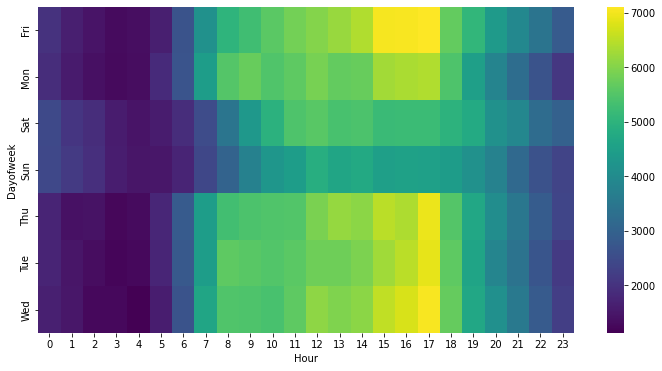

In [55]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

<Figure size 864x432 with 0 Axes>

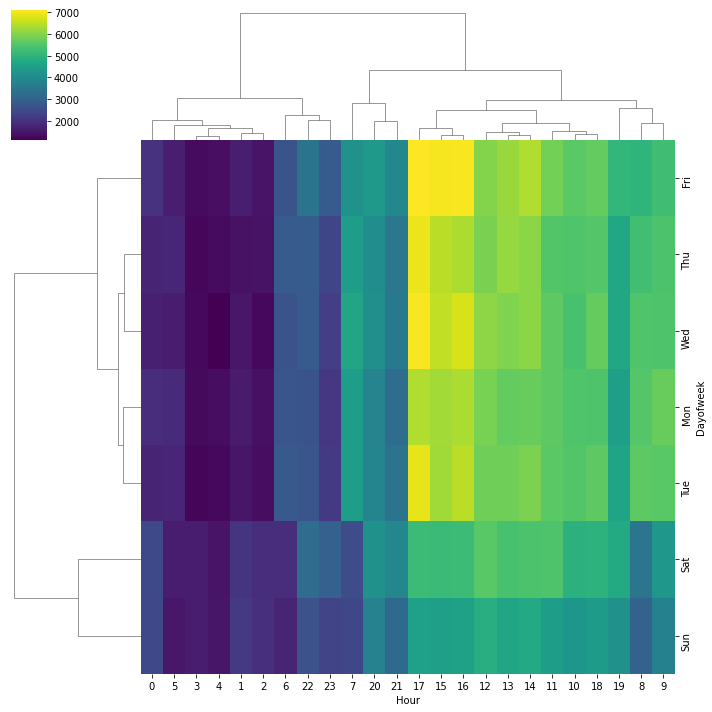

In [56]:
plt.figure(figsize=(12,6))
sns.clustermap(dayHour,cmap='viridis')

In [57]:
df.groupby(by=['Dayofweek','Month']).count()

lat    lng   desc   zip  title  timeStamp    twp   addr  \
Dayofweek Month                                                              
Fri       1       9309   9309   9309  8238   9309       9309   9305   9309   
          2       8255   8255   8255  7291   8255       8255   8251   8255   
          3      10941  10941  10941  9745  10941      10941  10932  10941   
          4       7997   7997   7997  7015   7997       7997   7995   7997   
          5       8904   8904   8904  7811   8904       8904   8899   8904   
...                ...    ...    ...   ...    ...        ...    ...    ...   
Wed       8       7984   7984   7984  6967   7984       7984   7979   7984   
          9       6844   6844   6844  6059   6844       6844   6842   6844   
          10      7876   7876   7876  6879   7876       7876   7871   7876   
          11      7410   7410   7410  6531   7410       7410   7407   7410   
          12      7682   7682   7682  6788   7682       7682   7677   7682   

                     e  reason   Hour   Date  
Dayofweek Month                               
Fri       1       9309    9309   9309   9309  
          2       8255    8255   8255   8255  
          3      10941   10941  10941  10941  
          4       7997    7997   7997   7997  
          5       8904    8904   8904   8904  
...                ...     ...    ...    ...  
Wed       8       7984    7984   7984   7984  
          9       6844    6844   6844   6844  
          10      7876    7876   7876   7876  
          11      7410    7410   7410   7410  
          12      7682    7682   7682   7682  

[84 rows x 12 columns]

In [58]:
df.groupby(by=['Dayofweek','Month']).count()['reason']

Dayofweek  Month
Fri        1         9309
           2         8255
           3        10941
           4         7997
           5         8904
                    ...  
Wed        8         7984
           9         6844
           10        7876
           11        7410
           12        7682
Name: reason, Length: 84, dtype: int64

In [59]:
df.groupby(by=['Dayofweek','Month']).count()['reason'].unstack()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Dayofweek,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Tue,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Wed,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682


In [60]:
dayMonth=df.groupby(by=['Dayofweek','Month']).count()['reason'].unstack()

<AxesSubplot:xlabel='Month', ylabel='Dayofweek'>

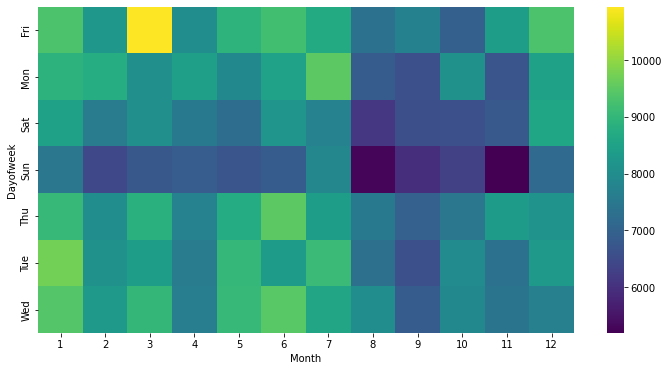

In [61]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

<Figure size 864x432 with 0 Axes>

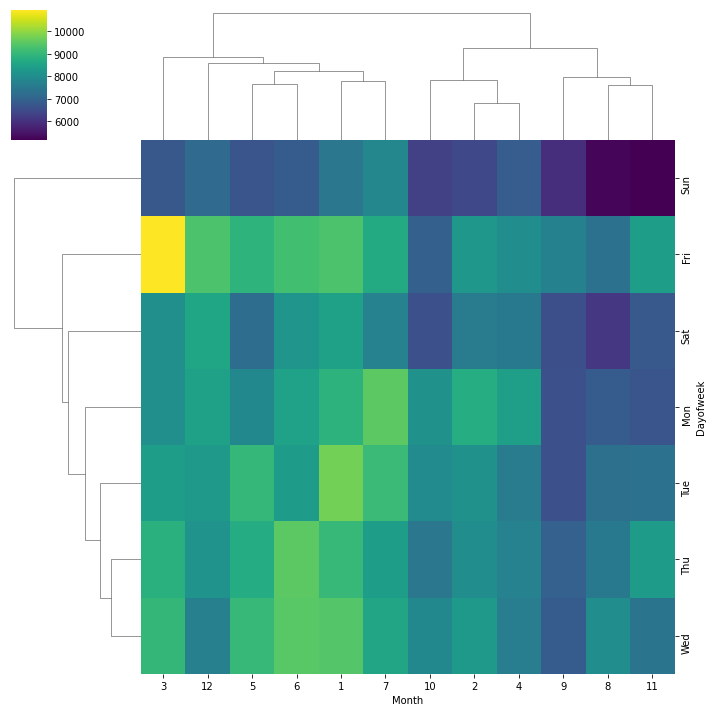

In [62]:
plt.figure(figsize=(12,6))
sns.clustermap(dayMonth,cmap='viridis')